# Portfolio Optimization  

“Modern Portfolio Theory (MPT), a hypothesis put forth by Harry Markowitz in his paper “Portfolio Selection,” (published in 1952 by the Journal of Finance) is an investment theory based on the idea that risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. It is one of the most important and influential economic theories dealing with finance and investment.

In [41]:
import numpy as np
import pandas as pd
import quandl
import matplotlib.pyplot as plt

## Monte Carlo Simulation for Optimization Search

We could randomly try to find the optimal portfolio balance using Monte Carlo simulation

In [42]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [43]:
#Grabbing the data from the quandl
aapl = quandl.get('WIKI/AAPL.11',start_date = start, end_date = end)
cisco = quandl.get('WIKI/CSCO.11',start_date = start, end_date = end)
ibm = quandl.get('WIKI/IBM.11',start_date = start, end_date = end)
amzn = quandl.get('WIKI/AMZN.11',start_date = start, end_date = end)

In [44]:
aapl.head()

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183


In [45]:
stocks = pd.concat([aapl, cisco, ibm, amzn], axis = 1)
stocks.columns = ['AAPL','CSCO','IBM','AMZN']
stocks.head()

,AAPL,CSCO,IBM,AMZN
Date,,,,
2012-01-03,52.848787,15.617341,157.578371,179.03
2012-01-04,53.132802,15.919125,156.935540,177.51
2012-01-05,53.722681,15.860445,156.191208,177.61
2012-01-06,54.284287,15.801764,154.398046,182.61
2012-01-09,54.198183,15.902359,153.594506,178.56


In [46]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

AAPL    0.000750
CSCO    0.000599
IBM     0.000081
AMZN    0.001328
dtype: float64

In [47]:
stocks.pct_change(1).corr()

,AAPL,CSCO,IBM,AMZN
AAPL,1.000000,0.301990,0.297498,0.235487
CSCO,0.301990,1.000000,0.424672,0.284470
IBM,0.297498,0.424672,1.000000,0.258492
AMZN,0.235487,0.284470,0.258492,1.000000


## Simulating Thousands of Possible Allocations 

In [48]:
stocks_normed = stocks/stocks.iloc[0]
stocks_normed.head()

,AAPL,CSCO,IBM,AMZN
Date,,,,
2012-01-03,1.000000,1.000000,1.000000,1.000000
2012-01-04,1.005374,1.019324,0.995921,0.991510
2012-01-05,1.016536,1.015566,0.991197,0.992068
2012-01-06,1.027162,1.011809,0.979817,1.019997
2012-01-09,1.025533,1.018250,0.974718,0.997375


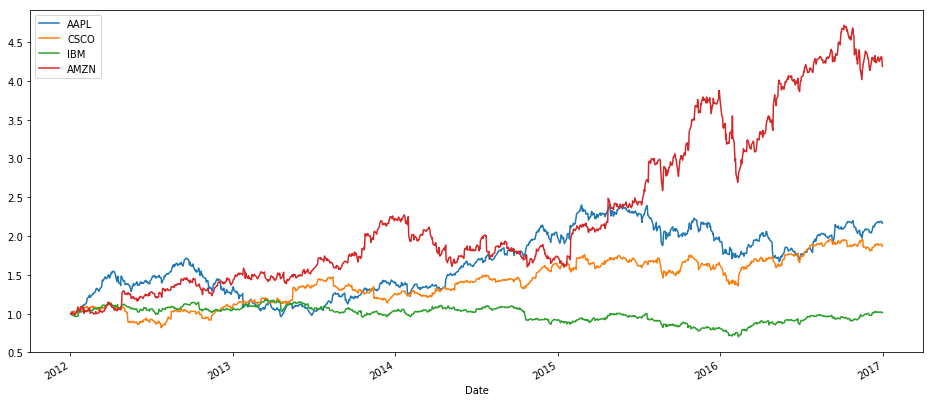

In [49]:
stocks_normed.plot(figsize = (16,7));

In [50]:
stocks_daily_ret = stocks.pct_change(1)
stocks_daily_ret.head()

,AAPL,CSCO,IBM,AMZN
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


### Log Returns vs Arithmetic Returns

We can switch over to using log returns instead of arithmetic returns, for most of use cases they are almost the same,but most technical analyses require detrending/normalizing the time series and using log returns is a nice way to do that.
Log returns are convenient to work with in many of the algorithms we will encounter.

For a full analysis of why we use log returns refer [here](https://quantivity.wordpress.com/2011/02/21/why-log-returns/) and [here](https://www.portfolioprobe.com/2010/10/04/a-tale-of-two-returns/).


Arithmetic Return  
$Rt = (Pt – Pt-1) / Pt-1 = Pt / Pt-1 – 1$

Logarithmic Return  
$rt = log(Pt / Pt-1) = log(Pt) – log(Pt-1)$

In [53]:
log_ret = np.log(stocks/stocks.shift(1)) 
log_ret.head()

,AAPL,CSCO,IBM,AMZN
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


In [13]:
stocks_daily_ret.head()

,AAPL,CSCO,IBM,AMZN
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


As we can observe the values are pretty similar.

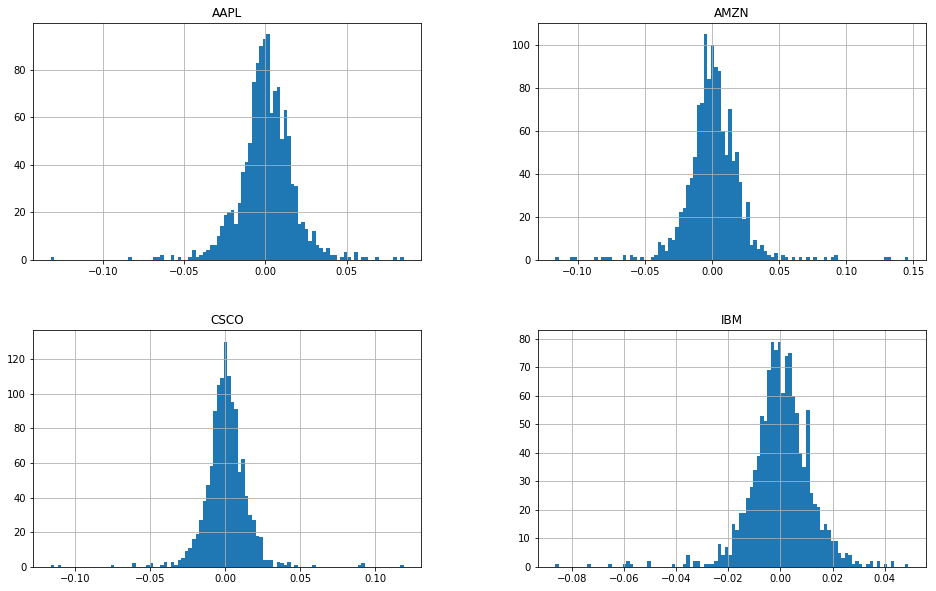

In [14]:
log_ret.hist(bins = 100, figsize= (16,10));

In [15]:
log_ret.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL,1257.0,0.000614,0.016466,-0.131875,-0.007358,0.000455,0.009724,0.085022
CSCO,1257.0,0.000497,0.014279,-0.116091,-0.006240,0.000213,0.007634,0.118862
IBM,1257.0,0.000011,0.011819,-0.086419,-0.005873,0.000049,0.006477,0.049130
AMZN,1257.0,0.001139,0.019362,-0.116503,-0.008534,0.000563,0.011407,0.146225


In [16]:
log_ret.mean() * 252 #The number of business days is 252 in a year

AAPL    0.154803
CSCO    0.125291
IBM     0.002788
AMZN    0.287153
dtype: float64

In [17]:
#Computing pairwise covariance
log_ret.cov()

,AAPL,CSCO,IBM,AMZN
AAPL,0.000271,0.000071,0.000057,0.000075
CSCO,0.000071,0.000204,0.000072,0.000079
IBM,0.000057,0.000072,0.000140,0.000059
AMZN,0.000075,0.000079,0.000059,0.000375


In [18]:
log_ret.cov() * 252 

,AAPL,CSCO,IBM,AMZN
AAPL,0.068326,0.017854,0.014464,0.018986
CSCO,0.017854,0.051381,0.018029,0.019956
IBM,0.014464,0.018029,0.035203,0.014939
AMZN,0.018986,0.019956,0.014939,0.094470


### Single Run for Some Random Allocation

In [19]:
#Creating a random seed
np.random.seed(101)

#Stocks
print('Stocks')
print(stocks.columns)
print('\n')

#Creating Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

#Rebalancing Weights to sum up to 1
print('Rebalanced')
weights =weights / np.sum(weights)
print(weights)
print('\n')

#Expected Return
print('Expected Portfolio Return')
#Returns = Sum over(weight_of_portfolio * Expected_stock_return_pct)
exp_ret = np.sum(log_ret.mean() * weights) * 252 
print(exp_ret)
print('\n')

#Expected Variance
print('Expected Volume')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['AAPL', 'CSCO', 'IBM', 'AMZN'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalanced
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
0.15599272049632504


Expected Volume
0.18502649565908943


Sharpe Ratio
0.843083148392655


Now we have to run it many times

In [20]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [21]:
sharpe_arr.max()

1.0303260551271305

In [22]:
sharpe_arr.argmax()

1419

In [23]:
all_weights[1419,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

In [24]:
max_sr_ret = ret_arr[1419]
max_sr_vol = vol_arr[1419]

### Plotting the data

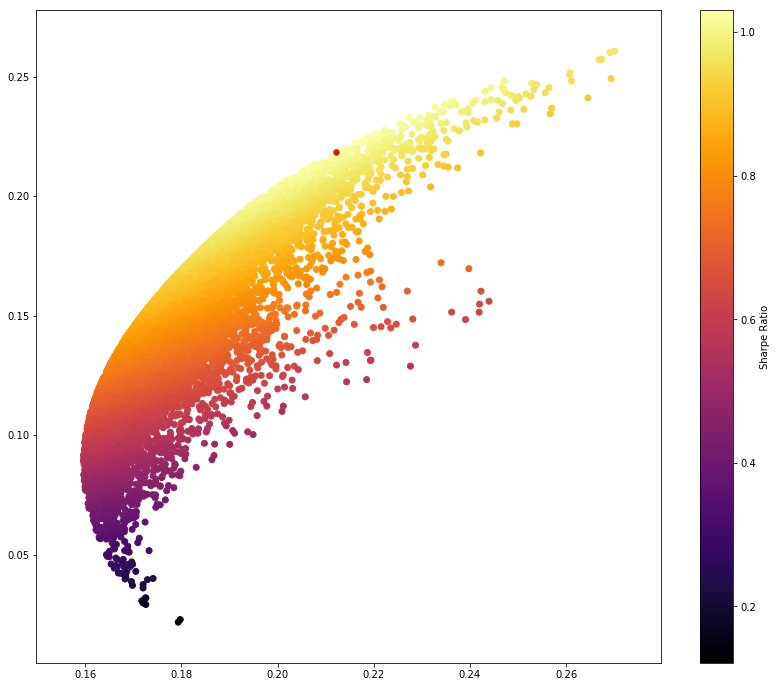

In [25]:
plt.figure(figsize= (14,12))
plt.scatter(vol_arr, ret_arr, c= sharpe_arr, cmap = 'inferno')
plt.colorbar(label = 'Sharpe Ratio' )
plt.scatter(vol_arr[1419], ret_arr[1419], c = 'r', edgecolors= 'grey')
plt.show()

## Mathematical Optimization

We can use optimization functions to find the ideal weights mathematically

### Functionalize Returns and SR operations

In [26]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [27]:
from scipy.optimize import minimize

In [28]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    In general, the optimization problems are of the form::
    
        minimize f(x) subject to
    
        g_i(x) >= 0,  i = 1,...,m
        h_j(x)  = 0,  j = 1,...,p
    
    where x is a vector of one or more variables.
    ``g_i(x)`` are the inequality constraints.
    ``h_j(x)`` are the equality constrains.
    
    Optionally, the lower and upper bounds for each element in x can also be
    specified using the `bounds` argument.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized. Must be in the form
        ``f(x, *args)``. The optimizing argument, ``x``, is a 1-D array
        of points, and ``args`` is a tuple of any additional fixed parameters
        needed 

Optimization works as a minimization function, since we actually want to maximize the Sharpe Ratio, we will need to turn it negative so we can minimize the negative sharpe (same as maximizing the postive sharpe)

In [29]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [30]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [31]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [32]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [33]:
# Initial Guess (equal distribution)
init_guess = [0.25,0.25,0.25,0.25]

In [34]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [35]:
opt_results

     fun: -1.0307168703349403
     jac: array([ 5.64306974e-05,  4.18424606e-05,  3.39921713e-01, -4.45097685e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.26628977, 0.20418982, 0.        , 0.5295204 ])

In [36]:
get_ret_vol_sr(opt_results.x)

array([0.21885915, 0.21233683, 1.03071687])

## All Optimal Portfolios (Efficient Frontier)

The efficient frontier is the set of optimal portfolios that offers the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal, because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are also sub-optimal, because they have a higher level of risk for the defined rate of return.

Efficient Frontier http://www.investopedia.com/terms/e/efficientfrontier

In [37]:
# Our returns go from 0 to somewhere along 0.3
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0,0.3,100) # Change 100 to a lower number for slower computers!

In [38]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [39]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

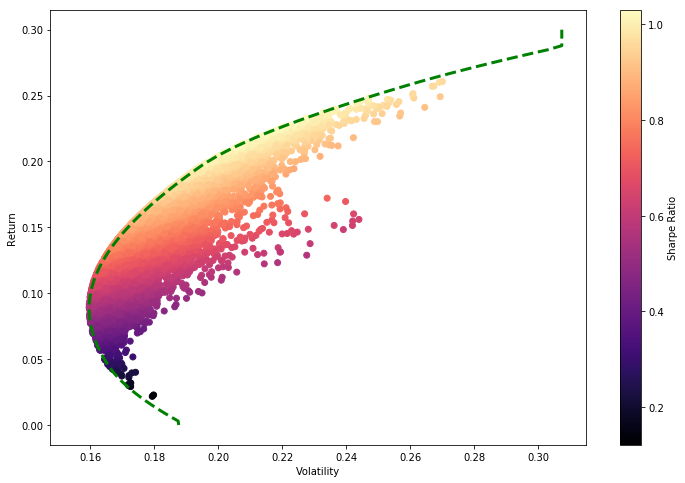

In [40]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='magma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3);

### de nada!